In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import src.feature as f

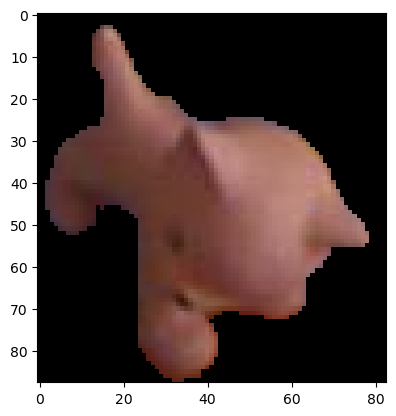

In [2]:
template=cv2.imread('./data/cat_lm/template.jpg')*(cv2.imread('./data/cat_lm/mask.jpg')>128)
plt.imshow(template[:,:,::-1])

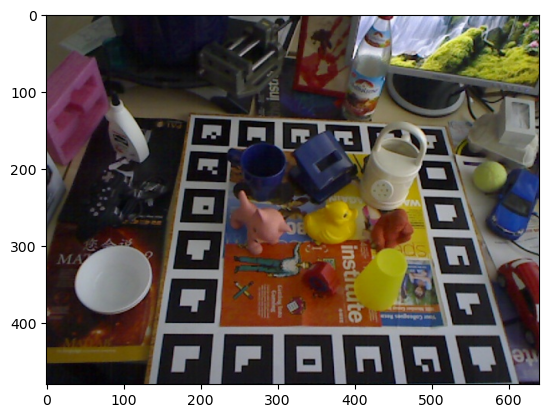

In [3]:
image=cv2.imread("./data/cat_lm/image.jpg")
plt.imshow(image[:,:,::-1])

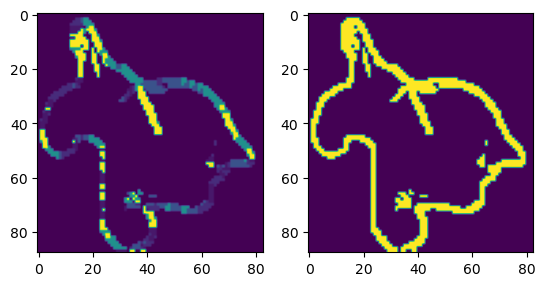

In [4]:
img_h,img_w=image.shape[:2]
tpl_h,tpl_w=template.shape[:2]
mask,template_feature=f.extrac_template_feature(template)
plt.subplot(121)
plt.imshow(template_feature)
plt.subplot(122)
plt.imshow(mask)

In [5]:
img_h,img_w

(480, 640)

In [12]:
for _ in range(30):
    img_feature=f.extrac_image_feature(image)
# plt.imshow(img_feature>0)

MemoryError: 

In [9]:
xy:tuple=0,0
maxscore=0
step=1
for row in range(0,img_h-tpl_h+1,step):
    for col in range(0,img_w-tpl_w+1,step):
        score=f.compute_feature_similarity(template_feature,img_feature[row:row+tpl_h,col:col+tpl_w],mask)
        # print(f"{row*img_w+col}/{(img_h-tpl_h)*(img_w-tpl_w)}: {score=}")
        if score>maxscore:
            maxscore=score
            xy=(col,row)
print(maxscore)

0.8338874657926907


In [10]:
xy,maxscore

((238, 226), 0.8338874657926907)

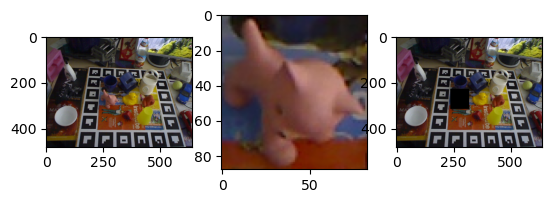

In [11]:
show_image= image.copy()
plt.subplot(131)
plt.imshow(show_image[:,:,::-1])
plt.subplot(132)
plt.imshow(show_image[xy[1]:xy[1]+tpl_h, xy[0]:xy[0]+tpl_w,::-1])
plt.subplot(133)
show_image[xy[1]:xy[1]+tpl_h, xy[0]:xy[0]+tpl_w] = 0
plt.imshow(show_image[:,:,::-1])

In [ ]:
roi=image[xy[1]:xy[1]+tpl_h, xy[0]:xy[0]+tpl_w,::-1]
msk,tf=f.extrac_template_feature(roi)
plt.subplot(131)
plt.imshow(roi)
plt.subplot(132)
plt.imshow(msk)
plt.subplot(133)
plt.imshow(template_feature)